# For Iris dataset your task is to print steps for every split in the decision tree.

Your Project is divided in 2 parts -

1. Print the Decision tree steps as specified in the example below. This is of 80 marks in total.
2. Decision Tree Implementation:  Building actual decision tree for the dataset and then printing it. 

This is of 20 marks.
Note: You can submit multiple times before deadline/evaluation. Your final submission will be evaluated. No submission is allowed after the project is evaluated by TA.

Dataset: Iris dataset.

Implementation: Consider the decision tree for OR below:




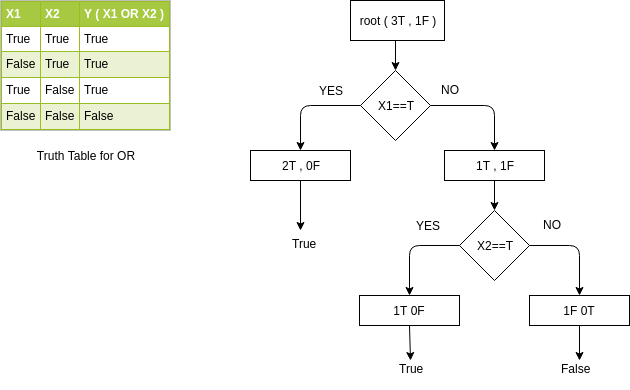

Expected Output:
### Level  0

Count of  0(False)  =  1

Count of  1(True)  =  3

Current Entropy  is =  0.811278124459

Splitting on feature  X1  with gain ratio  0.311278124459

### Level  1

Count of  0  =  1

Count of  1  =  1

Current Entropy is =  1.0

Splitting on feature  X2  with gain ratio  1.0

### Level  2

Count of  0  =  1

Current Entropy  is =  0.0

Reached leaf Node

### Level  2

Count of  1  =  1

Current Entropy  is =  0.0

Reached leaf Node

### Level  1

Count of  1  =  2

Current Entropy  is =  0.0

Reached leaf Node

Comments : Your code must have proper comments for better understanding.

In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
class TreeNode:   #class for creating the node of the tree
    
    #constructor
    def __init__(self, data, output):
        # data represents the feature upon which the node was splitting while fitting the training data
        # data = None for leaf node
        self.data = data
        # children of a node are stored as a dicticionary with key being the value of feature upon which the node was split
        # and the corresponding value stores the child TreeNode
        self.children = {}
        # output represents the class with current majority at this instance of the decision tree
        self.output = output
        # index will be used to assign a unique index to each node
        self.index = -1
        
    def add_child(self, feature_value, obj):
        self.children[feature_value] = obj

In [3]:
class DecisionTreeClassifier:
    
    #constructor
    def __init__(self):
        self.__root = None   # root represents the root node of the decision tree built after fitting the training data
    
    
    def __count_unique(self, Y):
        # returns a dictionary with keys as unique values of Y(i.e no of classes) and the corresponding value as its frequency
        d = {}
        for i in Y:
            if i not in d:  #if i not in d, then its freq for the first time = 1
                d[i]=1
            else:
                d[i]+=1     #if i is already present in d, then increment its freq by 1.
        return d
    
    
    def __entropy(self,Y):   # returns the entropy 
        
        freq_map = self.__count_unique(Y)    #to get the freq of each class in Y.
        entropy_ = 0
        total = len(Y)
        for i in freq_map:   #entropy = summation of (-p*log(p)) for all classes.
            p = freq_map[i]/total
            entropy_ += (-p) * math.log2(p)
        return entropy_
    
    
    def __gain_ratio(self, X, Y, selected_feature):   # returns the gain ratio
 
        info_orig = self.__entropy(Y)   # info_orig represents entropy before splitting
        info_f = 0    # info_f represents entropy after splitting upon the selected feature
        split_info = 0
        values = set(X[:,selected_feature])   #to get all the unique values present in the selected_feature in X.
        
        df = pd.DataFrame(X)
        # Adding Y values as the last column in the dataframe 
        df[df.shape[1]] = Y
        initial_size = df.shape[0] 
        for i in values:
            df1 = df[df[selected_feature] == i]   #creating a dataframe df1 by selecting those rows having selected_feature = i in dataframe df
            current_size = df1.shape[0]  #no of all rows of dataframe above.
            info_f += (current_size/initial_size) * self.__entropy(df1[df1.shape[1]-1])   #info (after selecting feature) = (|D1| / |D|) * entropy(class)
            split_info += (-current_size/initial_size)*math.log2(current_size/initial_size)   #split_info = (|D1| / |D|) * log(|D1| / |D|).

        # to handle the case when split info = 0 which leads to division by 0 error
        if split_info == 0 :
            return math.inf

        info_gain = info_orig - info_f
        gain_ratio = info_gain / split_info
        return gain_ratio
    
    
    def __gini_index(self,Y):   # returns the gini index.
         
        freq_map = self.__count_unique(Y)  #getting all the unique values in Y.
        gini_index_ = 1   #gini_index = 1 - summation of (prob ** 2) for all classes.
        total = len(Y)
        for i in freq_map:
            p = freq_map[i]/total  #p repesents probability.
            gini_index_ -= p**2
        return gini_index_
    
    def __gini_gain(self,X,Y,selected_feature):    # returns the gini gain
        
        gini_orig = self.__gini_index(Y)   # gini_orig represents gini index before splitting
        gini_split_f = 0    # gini_split_f represents gini index after splitting upon the selected feature
        values = set(X[:,selected_feature])  
        
        df = pd.DataFrame(X)
        # Adding Y values as the last column in the dataframe 
        df[df.shape[1]] = Y
        initial_size = df.shape[0] 
        for i in values:
            df1 = df[df[selected_feature] == i]  
            current_size = df1.shape[0]
            gini_split_f += (current_size/initial_size) * self.__gini_index(df1[df1.shape[1]-1])

        gini_gain_ = gini_orig - gini_split_f
        return gini_gain_
    
    
    def __decision_tree(self, X, Y, features, level, metric, classes):
        # returns the root of the Decision Tree (which consists of TreeNodes) built after fitting the training data
        # Here Nodes are printed as in PREORDER traversal
        # classes represents the different classes present in the classification problem.
        # metric can take value gain_ratio or gini_index
        # level represents depth of the tree
        # We split a node on a particular feature only once (in a given root to leaf node path)
        
        
        # If the node consists of only 1 class  ie it is a pure node. - BASE CASE 1
        if len(set(Y)) == 1:
            print("Level", level)
            output = None    #as there is only 1 class, so no role of majority class here.
            for i in classes:  #for all classes in Y, I am pinting the count.
                if i in Y:
                    output = i
                    print("Count of", i,"=",len(Y))  #count of i = len(Y) as here only 1 class is present
                else :
                    print("Count of",i,"=",0)
                    
            if metric == "gain_ratio":
                print("Current Entropy is =  0.0")  #as it is a pure node
            elif metric == "gini_index":   
                print("Current Gini Index is =  0.0")   #as it is a pure node

            print("Reached leaf Node")
            print()
            return TreeNode(None,output)

        # If we have run out of features to split upon    - BASE CASE 2
        # In this case we will output the class with maximum count
        if len(features) == 0:  #when len(features) == 0 means no feature is left for splitting.
            print("Level", level)
            freq_map = self.__count_unique(Y)
            output = None
            max_count = -math.inf
            for i in classes:
                if i not in freq_map:
                    print("Count of",i,"=",0)
                else :
                    if freq_map[i] > max_count :
                        output = i
                        max_count = freq_map[i]
                    print("Count of",i,"=", freq_map[i])

            if metric == "gain_ratio":
                print("Current Entropy  is =",self.__entropy(Y))
            elif metric == "gini_index":
                print("Current Gini Index is =",self.__gini_index(Y))            

            print("Reached leaf Node")
            print()
            return TreeNode(None,output)

        
        # Finding the best feature to split upon - when both the above conditions are false.
        max_gain = -math.inf
        final_feature = None
        for f in features :
            if metric == "gain_ratio":
                current_gain = self.__gain_ratio(X,Y,f)
            elif metric =="gini_index":
                current_gain = self.__gini_gain(X,Y,f)

            if current_gain > max_gain:
                max_gain = current_gain
                final_feature = f

        print("Level",level)
        freq_map = self.__count_unique(Y)
        output = None
        max_count = -math.inf

        for i in classes:
            if i not in freq_map:
                print("Count of",i,"=", 0)
            else :
                if freq_map[i] > max_count :
                    output = i
                    max_count = freq_map[i]
                print("Count of",i,"=",freq_map[i])

        if metric == "gain_ratio" :        
            print("Current Entropy is =",self.__entropy(Y))
            print("Splitting on feature  X[", final_feature,"] with gain ratio ", max_gain,sep="")
            print()
        elif metric == "gini_index":
            print("Current Gini Index is =", self.__gini_index(Y))
            print("Splitting on feature  X[",final_feature,"] with gini gain ", max_gain,sep="")
            print()

            
        unique_values = set(X[:,final_feature]) # unique_values represents the unique values of the feature selected
        df = pd.DataFrame(X)
        # Adding Y values as the last column in the dataframe
        df[df.shape[1]] = Y

        current_node = TreeNode(final_feature,output)   #now the current node changes.

        # Now removing the selected feature from the list as we do not want to split on one feature more than once(in a given root to leaf node path)
        index  = features.index(final_feature)  #getting the index of the selected feature to be removed
        features.remove(final_feature)
        
        for i in unique_values:
            # Creating a new dataframe with value of selected feature = i
            df1 = df[df[final_feature] == i]
            # Segregating the X and Y values and recursively calling on the splits
            node = self.__decision_tree(df1.iloc[:, 0: df1.shape[1]-1].values, df1.iloc[:, df1.shape[1]-1].values, features, level+1, metric, classes)
            current_node.add_child(i, node)  #adding this node to the current node.

        # Add the removed feature for the other nodes.    
        features.insert(index, final_feature)

        return current_node
    
    def fit(self,X,Y,metric="gain_ratio"):   # Fits to the given training data
        
        # metric can take value gain_ratio or gini_index
        features = [i for i in range(len(X[0]))]
        classes = set(Y)
        level = 0
        if metric != "gain_ratio" :
            if metric != "gini_index":
                metric="gain_ratio"  # if user entered a value which was neither gini_index nor gain_ratio
        self.__root = self.__decision_tree(X, Y, features, level, metric, classes)
     
    
    def __predict_for(self,data,node):
        # predicts the class for a given testing point and returns the answer
        
        # We have reached a leaf node
        if len(node.children) == 0 :
            return node.output

        val = data[node.data]   # represents the value of feature on which the split was made       
        if val not in node.children :
            return node.output
        
        # Recursively call on the splits
        return self.__predict_for(data, node.children[val])

    def predict(self,X):
        # This function returns Y predicted
        # X should be a 2-D np array
        Y = np.array([0 for i in range(len(X))])
        for i in range(len(X)):
            Y[i] = self.__predict_for(X[i],self.__root)
        return Y
    
    def score(self,X,Y):   # returns the mean accuracy
        
        Y_pred = self.predict(X)
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y[i]:
                count+=1
        return count/len(Y_pred)
    
    def export_tree_pdf(self,filename=None):
        # returns the tree as dot data
        # if filename is specified the function 
        # will save the pdf file in current directory which consists of the visual reresentation of the tree
        import pydotplus
        from collections import deque
        
        dot_data = '''digraph Tree {
node [shape=box] ;'''
        
        queue = deque()
        
        r = self.__root
        queue.append(r)
        count = 0
        if r.index == -1:
            r.index = count
        
        dot_data = dot_data + "\n{} [label=\"Feature to split upon : X[{}]\\nOutput at this node : {}\" ];".format(count,r.data,r.output) 
        
        # Doing LEVEL ORDER traversal in the tree (using a queue)
        while len(queue) != 0 :
            node = queue.popleft()
            for i in node.children:
                count+=1
                if(node.children[i].index==-1):
                    node.children[i].index = count
                
                # Creating child node
                dot_data = dot_data + "\n{} [label=\"Feature to split upon : X[{}]\\nOutput at this node : {}\" ];".format(node.children[i].index,node.children[i].data,node.children[i].output) 
                # Connecting parent node with child
                dot_data = dot_data + "\n{} -> {} [ headlabel=\"Feature value = {}\"]; ".format(node.index,node.children[i].index,i)
                # Adding child node to queue
                queue.append(node.children[i])
        
        dot_data = dot_data + "\n}"

        if filename != None:    
            graph = pydotplus.graph_from_dot_data(dot_data)
            graph.write_pdf(filename)    
        
        return dot_data
    
    
    
    
    
 

In [4]:
#Input the OR gate
clf1 = DecisionTreeClassifier()

# OR gate
x = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([0,
              1,
              1,
              1]) 
clf1.fit(x,y)
Y_pred = clf1.predict(x)
print("Predictions :",Y_pred)
print()
print("Score :",clf1.score(x,y)) # Score on training data
print()

Level 0
Count of 0 = 1
Count of 1 = 3
Current Entropy is = 0.8112781244591328
Splitting on feature  X[0] with gain ratio 0.31127812445913283

Level 1
Count of 0 = 1
Count of 1 = 1
Current Entropy is = 1.0
Splitting on feature  X[1] with gain ratio 1.0

Level 2
Count of 0 = 1
Count of 1 = 0
Current Entropy is =  0.0
Reached leaf Node

Level 2
Count of 0 = 0
Count of 1 = 1
Current Entropy is =  0.0
Reached leaf Node

Level 1
Count of 0 = 0
Count of 1 = 2
Current Entropy is =  0.0
Reached leaf Node

Predictions : [0 1 1 1]

Score : 1.0



In [5]:
print("DOT DATA :-",clf1.export_tree_pdf(filename="tree_OR.pdf"))

DOT DATA :- digraph Tree {
node [shape=box] ;
0 [label="Feature to split upon : X[0]\nOutput at this node : 1" ];
1 [label="Feature to split upon : X[1]\nOutput at this node : 0" ];
0 -> 1 [ headlabel="Feature value = 0"]; 
2 [label="Feature to split upon : X[None]\nOutput at this node : 1" ];
0 -> 2 [ headlabel="Feature value = 1"]; 
3 [label="Feature to split upon : X[None]\nOutput at this node : 0" ];
1 -> 3 [ headlabel="Feature value = 0"]; 
4 [label="Feature to split upon : X[None]\nOutput at this node : 1" ];
1 -> 4 [ headlabel="Feature value = 1"]; 
}
